##  Data Cleaning &  Exploratory Visualization

In this section, I will prepare the Airbnb dataset for analysis by performing essential data cleaning steps. This includes:

- Handling missing or inconsistent data
- Converting data types (e.g., dates, currency values)
- Renaming columns for clarity and consistency

Once the data is cleaned, I will begin exploring key aspects of the dataset through visualizations. These initial insights will help uncover trends in pricing, room types, geographical distribution, and availability across different neighborhoods in the city.


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling 
from datetime import datetime

# Show plots inline in Jupyter
%matplotlib inline

# Set Seaborn theme for better-looking plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


In [2]:
# Import the dataset
df = pd.read_csv(r'C:\Users\NONSO\Desktop\Python for Data Analysis\DataSets\Airbnb_Open_Data.csv')

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\4027707107.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\NONSO\Desktop\Python for Data Analysis\DataSets\Airbnb_Open_Data.csv')


In [3]:
# Import the dataset
df = pd.read_csv(r'C:\Users\NONSO\Desktop\Python for Data Analysis\DataSets\Airbnb_Open_Data.csv', low_memory=False)


# "low_memory=False" is to avoid dtype issues on big/messy CSV files



In [4]:
df.head()     #returns the first 5 rows of the DataFrame by default

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.shape      #get the dimensions(rows and columns) of a DataFrame

(102599, 26)

In [6]:
df.size        # shows total number of element

2667574

In [7]:
df.index         # provides the index of the data frame 

RangeIndex(start=0, stop=102599, step=1)

In [8]:
df.columns     #returns the column names of a DataFrame

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
df.info()     #concise summary of the DataFrame, including the number of non-null values, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [10]:
df.describe()     #generates summary statistics  for numerical columns in the DataFrame

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Handle Missing Data


In [11]:
# Check for missing values:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<h4>  Identify Columns with a High Number of Missing Values</h4>

In [12]:
# drop "house_rules" and "license" columns
df.drop(columns=['house_rules', 'license'], inplace=True)


In [13]:
df.head(1)   # lets check if the columns was dropped sucessfully 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0


<h4> Handle Columns with Moderate Missing Values
<h4> For columns with a moderate amount of missing values (like price, service fee, reviews per month, and calculated host listings count), i will consider imputing the missing values based on the context. The "median" is less sensitive to outliers and it will be used to fill in the missing values.

In [14]:
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0


In [15]:
# for columns( price, service fee, reviews per month, and calculated host listings count)  remove the spaces and "$" sign for easy cleaning. 
# if its not done, then we will have errors and the cleaning cant be done 

# List of columns to clean
columns_to_clean = ['price', 'service fee', 'reviews per month', 'calculated host listings count']

# Clean and convert each column
for col in columns_to_clean:
    df[col] = df[col].replace({r'\$': '', ',': '', ' ': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Safely convert to numeric



In [16]:
# Now, fill missing values for each column using "Median"
#this will be done using the dictionary 
df.fillna({
    'price': df['price'].median(),
    'service fee': df['service fee'].median(),
    'reviews per month': df['reviews per month'].median(),
    'calculated host listings count': df['calculated host listings count'].median()
}, inplace=True)

In [17]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,844.0,169.0,1.0,0.0,NaN,0.74,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,988.0,198.0,3.0,0.0,NaN,0.74,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,546.0,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


In [18]:
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                                 0
service fee                           0
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                     0
review rate number                  326
calculated host listings count        0
availability 365                    448
dtype: int64

In [19]:
# for column "host_identity_verified" the empty columns be filled with "unconfirmed"
df['host_identity_verified'] = df['host_identity_verified'].fillna('unconfirmed')



In [20]:
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified                0
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                                 0
service fee                           0
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                     0
review rate number                  326
calculated host listings count        0
availability 365                    448
dtype: int64

In [21]:
# under the "neighbourhood group"& "neighbourhood" column we have empty rows. we will drop such rows
df.dropna(subset=['neighbourhood group', 'neighbourhood'], inplace=True)


In [22]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                             529
country code                        128
instant_bookable                    102
cancellation_policy                  73
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
last review                       15889
reviews per month                     0
review rate number                  324
calculated host listings count        0
availability 365                    436
dtype: int64

In [23]:
# for every row under the "country" column, let it be filled with "United States".
# the reason is that "our dataset is focused on united states"
df['country'] = df['country'].fillna('United States')


In [24]:
df.country.nunique() # lets get the whole unique content we have in "country " column

1

In [25]:
# for every row under the "country code" column, let it be filled with "US".
# the reason is that "our dataset is focused on united states"
df['country code'] = df['country code'].fillna('US')

In [26]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                    102
cancellation_policy                  73
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
last review                       15889
reviews per month                     0
review rate number                  324
calculated host listings count        0
availability 365                    436
dtype: int64

In [27]:
# column "instant bookable" is categorical data, i will use "mode()" operation becuse it will return the highest occurence from the column
# "mode()[0]" will now select the most occurred in the column. 
df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].mode()[0])



C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\2417175272.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].mode()[0])


In [28]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                  73
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
last review                       15889
reviews per month                     0
review rate number                  324
calculated host listings count        0
availability 365                    436
dtype: int64

In [29]:
# for columns "cancelltion_policy" & "room type" which are categorical data, we will use "mode()" operation becuse it will return the highest occurence from each column
# "mode()[0]" will now select the most occurred in the column. 

df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0])
df['room type'] = df['room type'].fillna(df['room type'].mode()[0])


In [30]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
last review                       15889
reviews per month                     0
review rate number                  324
calculated host listings count        0
availability 365                    436
dtype: int64

In [31]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,844.0,169.0,1.0,0.0,NaN,0.74,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,988.0,198.0,3.0,0.0,NaN,0.74,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,546.0,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


In [32]:
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].mean())

In [33]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
last review                       15889
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                    436
dtype: int64

In [34]:
df['minimum nights'] = df['minimum nights'].fillna(df['minimum nights'].median())

In [35]:
# filling missing values with zero is usually the most justifiable and least misleading approach due to the likely meaning of a missing entry.
# also the mising values are '183' 
df['number of reviews'] = df['number of reviews'].fillna(0)  

In [36]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                   209
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       15889
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                    436
dtype: int64

In [37]:
df['Construction year'] = df['Construction year'].fillna(df['Construction year'].median())


In [38]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       15889
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                    436
dtype: int64

In [39]:
df['availability 365'].dtype

dtype('float64')

In [40]:
# 1. Convert everything to string, strip spaces
df['availability 365'] = df['availability 365'].astype(str).str.strip()

# 2. Replace clearly invalid or placeholder strings with NaN
df['availability 365'] = df['availability 365'].replace(
    ['', 'NaN', 'nan', 'None', '-', 'N/A', 'null', 'Null'],
    np.nan
)

# 3. Convert the cleaned column to numeric (invalid values will become NaN)
df['availability 365'] = pd.to_numeric(df['availability 365'], errors='coerce')

# 4. Fill NaN values with median (if any valid numbers exist)
if df['availability 365'].notna().sum() > 0:
    df['availability 365'] = df['availability 365'].fillna(df['availability 365'].median())
else:
    print("⚠️ No valid numeric values found in 'availability 365'")


In [41]:
df.isnull().sum()

id                                    0
NAME                                248
host id                               0
host_identity_verified                0
host name                           405
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       15889
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64

In [42]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,844.0,169.0,1.0,0.0,NaN,0.74,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,988.0,198.0,3.0,0.0,NaN,0.74,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,546.0,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


<h4> For Columns "Name": Is just the name of the apartment which will have no effect on my analysis <h4> 
   <h4> "Host_name" : is the Airbnb room ownwer which also will have no impact on anlysis <h4>
   <h4> "Last review": I decided not to touch it becuse im not doing a time series analysis </h4>

### Check for duplicates ###

In [43]:
df.head(4)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0


In [44]:
df.duplicated().sum()   # Lets check for duplicates

541

In [45]:
df.drop_duplicates(inplace=True)  # Lets drop those duplicates 

In [46]:
df.shape   #get the dimensions(rows and columns) of a DataFrame

(102013, 24)

<h4> Renaming of Columns</h4>

In [47]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [48]:
df.rename(columns={ 
    'id': 'Listing_ID',
    'NAME': 'Listing_Name',
    'host id': 'Host_ID',
    'host_identity_verified': 'Host_Identity_Verified',
    'host name': 'Host_Name',
    'neighbourhood group': 'Region',
    'neighbourhood': 'Neighbourhood',
    'lat': 'Latitude',
    'long': 'Longitude',
    'country': 'Country',
    'country code': 'Country_Code',
    'instant_bookable': 'Instant_Bookable',
    'cancellation_policy': 'Cancellation_Policy',
    'room type': 'Room_Type',
    'Construction year': 'Construction_Year',
    'price': 'Price',
    'service fee': 'Service_Fee',
    'minimum nights': 'Minimum_Nights',
    'number of reviews': 'Number_of_Reviews',
    'last review': 'Last_Review',
    'reviews per month': 'Reviews_Per_Month',
    'review rate number': 'Review_Rate_Number',
    'calculated host listings count': 'Calculated_Host_Listings_Count',
    'availability 365': 'Availability_365'
}, inplace=True)


In [49]:
df.columns

Index(['Listing_ID', 'Listing_Name', 'Host_ID', 'Host_Identity_Verified',
       'Host_Name', 'Region', 'Neighbourhood', 'Latitude', 'Longitude',
       'Country', 'Country_Code', 'Instant_Bookable', 'Cancellation_Policy',
       'Room_Type', 'Construction_Year', 'Price', 'Service_Fee',
       'Minimum_Nights', 'Number_of_Reviews', 'Last_Review',
       'Reviews_Per_Month', 'Review_Rate_Number',
       'Calculated_Host_Listings_Count', 'Availability_365'],
      dtype='object')

### Data Consistency
Categorical columns such as 'Instant_Bookable', 'Cancellation_Policy''host_identity_verified' should hve data consistency. the content of such columns should be 'only upper case letters"or "intial capitals". Also be free from "Extra Spaces & Mixed Cases"


In [50]:
df['Host_Identity_Verified'].unique()   #lets get the unique values 

array(['unconfirmed', 'verified'], dtype=object)

In [51]:
# "str.title()" capitalizes the first letter of each word.
# "str.strip()" removes any extra spaces from the text.

df['Host_Identity_Verified'] = df['Host_Identity_Verified'].str.title().str.strip()

In [52]:
df['Host_Identity_Verified']    #just to confirm that extra spaces hs been removed 

0         Unconfirmed
1            Verified
2         Unconfirmed
3         Unconfirmed
4            Verified
             ...     
102053    Unconfirmed
102054       Verified
102055       Verified
102056    Unconfirmed
102057       Verified
Name: Host_Identity_Verified, Length: 102013, dtype: object

In [53]:
df['Instant_Bookable'].unique()

array([False,  True])

In [54]:
# Convert boolean values to strings
df['Instant_Bookable'] = df['Instant_Bookable'].astype(str)

# Now you can apply string methods
df['Instant_Bookable'] = df['Instant_Bookable'].str.title().str.strip()



In [55]:
df['Instant_Bookable']

0         False
1         False
2          True
3          True
4         False
          ...  
102053     True
102054    False
102055     True
102056     True
102057    False
Name: Instant_Bookable, Length: 102013, dtype: object

In [56]:
df.Cancellation_Policy.unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [57]:
# "str.title()" capitalizes the first letter of each word.
# "str.strip()" removes any extra spaces from the text.

df['Cancellation_Policy'] = df['Cancellation_Policy'].str.title().str.strip()

In [58]:
df.Cancellation_Policy

0           Strict
1         Moderate
2         Flexible
3         Moderate
4         Moderate
            ...   
102053    Moderate
102054    Flexible
102055    Moderate
102056      Strict
102057    Flexible
Name: Cancellation_Policy, Length: 102013, dtype: object

In [59]:
df.Country.unique()

array(['United States'], dtype=object)

In [60]:
df.Country

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
102053    United States
102054    United States
102055    United States
102056    United States
102057    United States
Name: Country, Length: 102013, dtype: object

In [61]:
df['Country'] = 'United States of America (USA)'
# change the content of the 'Country" column to 'United States of America (USA)'

In [62]:
df['Country']   # to confirm

0         United States of America (USA)
1         United States of America (USA)
2         United States of America (USA)
3         United States of America (USA)
4         United States of America (USA)
                       ...              
102053    United States of America (USA)
102054    United States of America (USA)
102055    United States of America (USA)
102056    United States of America (USA)
102057    United States of America (USA)
Name: Country, Length: 102013, dtype: object

In [63]:
# "str.title()" capitalizes the first letter of each word.
# "str.strip()" removes any extra spaces from the text.

df['Region'] = df['Region'].str.title().str.strip()

In [64]:
df['Region']

0          Brooklyn
1         Manhattan
2         Manhattan
3          Brooklyn
4         Manhattan
            ...    
102053     Brooklyn
102054     Brooklyn
102055     Brooklyn
102056    Manhattan
102057    Manhattan
Name: Region, Length: 102013, dtype: object

In [65]:
df.columns

Index(['Listing_ID', 'Listing_Name', 'Host_ID', 'Host_Identity_Verified',
       'Host_Name', 'Region', 'Neighbourhood', 'Latitude', 'Longitude',
       'Country', 'Country_Code', 'Instant_Bookable', 'Cancellation_Policy',
       'Room_Type', 'Construction_Year', 'Price', 'Service_Fee',
       'Minimum_Nights', 'Number_of_Reviews', 'Last_Review',
       'Reviews_Per_Month', 'Review_Rate_Number',
       'Calculated_Host_Listings_Count', 'Availability_365'],
      dtype='object')

In [66]:
# "str.title()" capitalizes the first letter of each word.
# "str.strip()" removes any extra spaces from the text.

df['Neighbourhood'] = df['Neighbourhood'].str.title().str.strip()

In [67]:
df

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States of America (USA),...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,Unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States of America (USA),...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States of America (USA),...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,Unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States of America (USA),...,2012.0,696.0,125.0,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,Verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States of America (USA),...,2012.0,909.0,125.0,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,Verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States of America (USA),...,2012.0,387.0,125.0,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,Unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States of America (USA),...,2012.0,848.0,125.0,2.0,0.0,NaN,0.74,1.0,1.0,0.0


In [69]:
# "str.title()" capitalizes the first letter of each word.
# "str.strip()" removes any extra spaces from the text.

df['Listing_Name'] = df['Listing_Name'].str.title().str.strip()

In [70]:
df.head(3)

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,The Village Of Harlem....New York !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States of America (USA),...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0


In [71]:
df.isnull().sum()

Listing_ID                            0
Listing_Name                        248
Host_ID                               0
Host_Identity_Verified                0
Host_Name                           403
Region                                0
Neighbourhood                         0
Latitude                              8
Longitude                             8
Country                               0
Country_Code                          0
Instant_Bookable                      0
Cancellation_Policy                   0
Room_Type                             0
Construction_Year                     0
Price                                 0
Service_Fee                           0
Minimum_Nights                        0
Number_of_Reviews                     0
Last_Review                       15828
Reviews_Per_Month                     0
Review_Rate_Number                    0
Calculated_Host_Listings_Count        0
Availability_365                      0
dtype: int64

In [72]:
# Fill missing values with 'Unknown' or NaN as needed
df['Listing_Name'] = df['Listing_Name'].fillna('Unknown')  # Fill missing with 'Unknown'
df['Host_Name'] = df['Host_Name'].fillna('Unknown')  # Fill missing with 'Unknown'
df['Last_Review'] = df['Last_Review'].fillna('NaN')  # Keep as NaN if missing
df['Latitude'] = df['Latitude'].fillna('NaN')  # Keep as NaN if missing
df['Longitude'] = df['Longitude'].fillna('NaN')  # Keep as NaN if missing


# This was done because I wont be using any of the columns for my analysis

In [73]:
df.isnull().sum()

Listing_ID                        0
Listing_Name                      0
Host_ID                           0
Host_Identity_Verified            0
Host_Name                         0
Region                            0
Neighbourhood                     0
Latitude                          0
Longitude                         0
Country                           0
Country_Code                      0
Instant_Bookable                  0
Cancellation_Policy               0
Room_Type                         0
Construction_Year                 0
Price                             0
Service_Fee                       0
Minimum_Nights                    0
Number_of_Reviews                 0
Last_Review                       0
Reviews_Per_Month                 0
Review_Rate_Number                0
Calculated_Host_Listings_Count    0
Availability_365                  0
dtype: int64

In [74]:
df

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,The Village Of Harlem....New York !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.9419,United States of America (USA),...,2005.0,620.0,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0
3,1002755,Unknown,85098326012,Unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States of America (USA),...,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft By Central Park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States of America (USA),...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy Bright Room Near Prospect Park,77326652202,Unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States of America (USA),...,2012.0,696.0,125.0,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0
102054,57365760,Private Bedroom With Amazing Rooftop View,45936254757,Verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States of America (USA),...,2012.0,909.0,125.0,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom For 2 To 4 People,23801060917,Verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States of America (USA),...,2012.0,387.0,125.0,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0
102056,57366865,Room & Private Bathroom In Historic Harlem,15593031571,Unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States of America (USA),...,2012.0,848.0,125.0,2.0,0.0,NaN,0.74,1.0,1.0,0.0


In [75]:
df.columns

Index(['Listing_ID', 'Listing_Name', 'Host_ID', 'Host_Identity_Verified',
       'Host_Name', 'Region', 'Neighbourhood', 'Latitude', 'Longitude',
       'Country', 'Country_Code', 'Instant_Bookable', 'Cancellation_Policy',
       'Room_Type', 'Construction_Year', 'Price', 'Service_Fee',
       'Minimum_Nights', 'Number_of_Reviews', 'Last_Review',
       'Reviews_Per_Month', 'Review_Rate_Number',
       'Calculated_Host_Listings_Count', 'Availability_365'],
      dtype='object')

In [76]:
df.dtypes

Listing_ID                          int64
Listing_Name                       object
Host_ID                             int64
Host_Identity_Verified             object
Host_Name                          object
Region                             object
Neighbourhood                      object
Latitude                           object
Longitude                          object
Country                            object
Country_Code                       object
Instant_Bookable                   object
Cancellation_Policy                object
Room_Type                          object
Construction_Year                 float64
Price                             float64
Service_Fee                       float64
Minimum_Nights                    float64
Number_of_Reviews                 float64
Last_Review                        object
Reviews_Per_Month                 float64
Review_Rate_Number                float64
Calculated_Host_Listings_Count    float64
Availability_365                  

In [78]:
# lets eliminate the decimal points of columns under "columns_to_change" by changing their datatype from "float" to "integer"
columns_to_change = ['Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights', 'Number_of_Reviews', 'Review_Rate_Number', 'Calculated_Host_Listings_Count', 'Availability_365']
df[columns_to_change] = df[columns_to_change].astype(int)  


In [79]:
df.Price

0          966
1          142
2          620
3          368
4          204
          ... 
102053     696
102054     909
102055     387
102056     848
102057    1128
Name: Price, Length: 102013, dtype: int32

In [80]:
df['Reviews_Per_Month'] = df['Reviews_Per_Month'].round(2)
# round up items under 'Reviews_Per_Month to 2decimal places 

### Exploratory Data Analysis

In [81]:
df

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,2020,966,193,10,9,10/19/2021,0.21,4,6,286
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,2007,142,28,30,45,5/21/2022,0.38,4,2,228
2,1002403,The Village Of Harlem....New York !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.9419,United States of America (USA),...,2005,620,124,3,0,NaN,0.74,5,1,352
3,1002755,Unknown,85098326012,Unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States of America (USA),...,2005,368,74,30,270,7/5/2019,4.64,4,1,322
4,1003689,Entire Apt: Spacious Studio/Loft By Central Park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States of America (USA),...,2009,204,41,10,9,11/19/2018,0.10,3,1,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy Bright Room Near Prospect Park,77326652202,Unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States of America (USA),...,2012,696,125,7,12,3/27/2019,0.44,5,1,0
102054,57365760,Private Bedroom With Amazing Rooftop View,45936254757,Verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States of America (USA),...,2012,909,125,1,19,8/31/2017,0.72,3,2,0
102055,57366313,Pretty Brooklyn One-Bedroom For 2 To 4 People,23801060917,Verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,United States of America (USA),...,2012,387,125,2,50,6/26/2019,3.12,4,2,235
102056,57366865,Room & Private Bathroom In Historic Harlem,15593031571,Unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States of America (USA),...,2012,848,125,2,0,NaN,0.74,1,1,0


In [82]:
# lets check for negative values in this column 
negative_nights = df[df['Minimum_Nights'] < 0].count()
print(negative_nights)

Listing_ID                        13
Listing_Name                      13
Host_ID                           13
Host_Identity_Verified            13
Host_Name                         13
Region                            13
Neighbourhood                     13
Latitude                          13
Longitude                         13
Country                           13
Country_Code                      13
Instant_Bookable                  13
Cancellation_Policy               13
Room_Type                         13
Construction_Year                 13
Price                             13
Service_Fee                       13
Minimum_Nights                    13
Number_of_Reviews                 13
Last_Review                       13
Reviews_Per_Month                 13
Review_Rate_Number                13
Calculated_Host_Listings_Count    13
Availability_365                  13
dtype: int64


In [83]:
# column "Minimum_Nights" has negative values 
# Calculate the median of the Minimum_Nights column (excluding negative values)
median_min_nights = df[df['Minimum_Nights'] >= 0]['Minimum_Nights'].median()

# Replace negative values in the Minimum_Nights column with the median
df['Minimum_Nights'] = df['Minimum_Nights'].apply(lambda x: median_min_nights if x < 1 else x)


In [84]:
df.Minimum_Nights.min()

1.0

In [85]:
# Calculate price per night
df['Price_Per_Night'] = df['Price'] / df['Minimum_Nights']
df['Price_Per_Night'] = df['Price_Per_Night'].round(2)    # round(2) is approximate to 2 decimal places 

In [86]:
df.head(10)

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Price,Service_Fee,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365,Price_Per_Night
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,966,193,10.0,9,10/19/2021,0.21,4,6,286,96.60
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,142,28,30.0,45,5/21/2022,0.38,4,2,228,4.73
2,1002403,The Village Of Harlem....New York !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.9419,United States of America (USA),...,620,124,3.0,0,NaN,0.74,5,1,352,206.67
3,1002755,Unknown,85098326012,Unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States of America (USA),...,368,74,30.0,270,7/5/2019,4.64,4,1,322,12.27
4,1003689,Entire Apt: Spacious Studio/Loft By Central Park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States of America (USA),...,204,41,10.0,9,11/19/2018,0.10,3,1,289,20.40
5,1004098,Large Cozy 1 Br Apartment In Midtown East,45498551794,Verified,Michelle,Manhattan,Murray Hill,40.74767,-73.975,United States of America (USA),...,577,115,3.0,74,6/22/2019,0.59,3,1,374,192.33
6,1004650,Blissartsspace!,61300605564,Unconfirmed,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States of America (USA),...,71,14,45.0,49,10/5/2017,0.40,5,1,224,1.58
7,1005202,Blissartsspace!,90821839709,Unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States of America (USA),...,1060,212,45.0,49,10/5/2017,0.40,5,1,219,23.56
8,1005754,Large Furnished Room Near B'Way,79384379533,Verified,Evelyn,Manhattan,Hell'S Kitchen,40.76489,-73.98493,United States of America (USA),...,1018,204,2.0,430,6/24/2019,3.47,3,1,180,509.00
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,Unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States of America (USA),...,291,58,2.0,118,7/21/2017,0.99,5,1,375,145.50


In [87]:
# Calculate service fee per night
df['Service_Fee_Per_Night'] = df['Service_Fee'] / df['Minimum_Nights']
df['Service_Fee_Per_Night'] = df['Service_Fee_Per_Night'].round(2)   # round(2) is approximate to 2 decimal places  

In [91]:
df.Price.min()

50

### Calculate Total Revenue and Average Revenue per Listing

In [92]:
#remove negative values in "Availability_365" column

# Calculate the median of valid (non-negative) availability values
median_availability = df[df['Availability_365'] >= 0]['Availability_365'].median()

# Replace negative values with the median
df['Availability_365'] = df['Availability_365'].apply(lambda x: median_availability if x < 0 else x)


In [93]:
# Check if there are still negative values
print(df[df['Availability_365'] < 0])


Empty DataFrame
Columns: [Listing_ID, Listing_Name, Host_ID, Host_Identity_Verified, Host_Name, Region, Neighbourhood, Latitude, Longitude, Country, Country_Code, Instant_Bookable, Cancellation_Policy, Room_Type, Construction_Year, Price, Service_Fee, Minimum_Nights, Number_of_Reviews, Last_Review, Reviews_Per_Month, Review_Rate_Number, Calculated_Host_Listings_Count, Availability_365, Price_Per_Night, Service_Fee_Per_Night]
Index: []

[0 rows x 26 columns]


In [94]:
# find  Estimated_Revenue
df['Estimated_Revenue'] = (df['Price'] / df['Minimum_Nights']) * df['Availability_365']


In [95]:
# round(0) is to approximate to nearest integer 
# "astype(int)" is to change the column to integer 
df['Estimated_Revenue'] = df['Estimated_Revenue'].round(0).astype(int)


In [98]:
#Get Total and Average Revenue
total_revenue = df['Estimated_Revenue'].sum()
average_revenue = df['Estimated_Revenue'].mean()

print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Average Revenue per Listing: ${average_revenue:,.2f}")

 Total Revenue: $4,110,079,734.00
 Average Revenue per Listing: $40,289.76


### Average Revenue by Region

In [99]:
df.head(3)

,Listing_ID,Listing_Name,Host_ID,Host_Identity_Verified,Host_Name,Region,Neighbourhood,Latitude,Longitude,Country,...,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count,Availability_365,Price_Per_Night,Service_Fee_Per_Night,Estimated_Revenue
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States of America (USA),...,10.0,9,10/19/2021,0.21,4,6,286.0,96.60,19.30,27628
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States of America (USA),...,30.0,45,5/21/2022,0.38,4,2,228.0,4.73,0.93,1079
2,1002403,The Village Of Harlem....New York !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.9419,United States of America (USA),...,3.0,0,NaN,0.74,5,1,352.0,206.67,41.33,72747


In [100]:
df.Region.nunique()

7

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\307743686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue_by_region, x='Region', y='Estimated_Revenue', palette='viridis', legend=False)


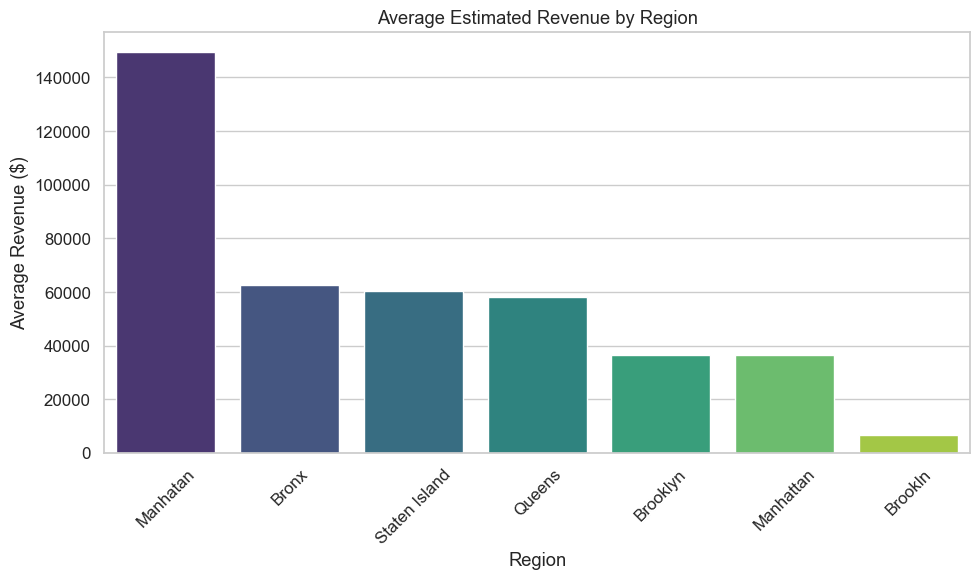

In [101]:
# Group by Region and calculate average revenue
avg_revenue_by_region = df.groupby('Region')['Estimated_Revenue'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_by_region, x='Region', y='Estimated_Revenue', palette='viridis', legend=False)
plt.title('Average Estimated Revenue by Region') 
plt.ylabel('Average Revenue ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Average Revenue by Room Type

In [102]:
df.Room_Type.nunique()

4

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\799635985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue_by_room, x='Room_Type', y='Estimated_Revenue', palette='coolwarm')


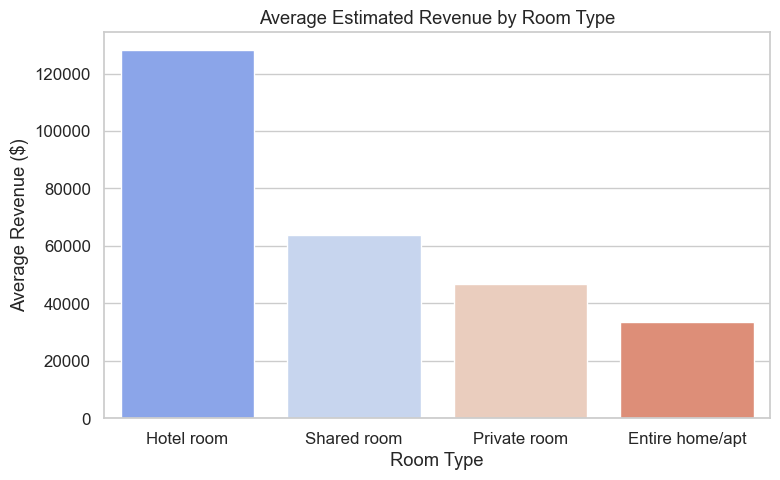

In [103]:
# Group by Room Type
avg_revenue_by_room = df.groupby('Room_Type')['Estimated_Revenue'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_revenue_by_room, x='Room_Type', y='Estimated_Revenue', palette='coolwarm')
plt.title('Average Estimated Revenue by Room Type')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()


<H4> Lets combine "Average Revenue by Region and Room Type"? This will help us understand the average revenue of different 'Room Types' in different 'Regions' 

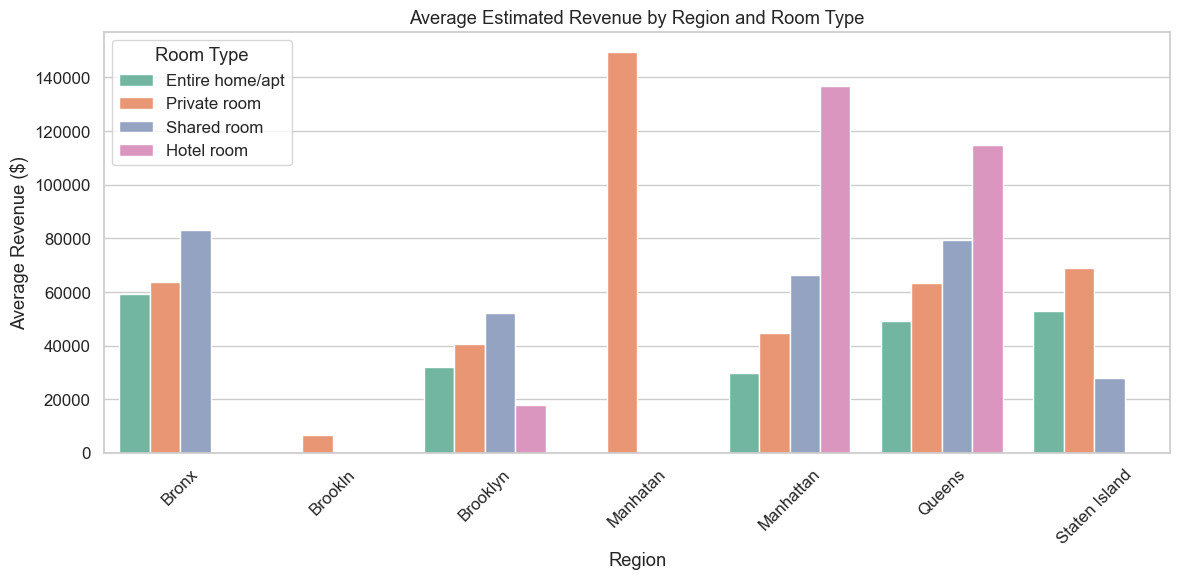

In [104]:
# Group by Region and Room_Type, calculate average revenue
grouped = df.groupby(['Region', 'Room_Type'])['Estimated_Revenue'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Region', y='Estimated_Revenue', hue='Room_Type', palette='Set2')

plt.title('Average Estimated Revenue by Region and Room Type')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### Impact of Host identity been verified on Estimated revenue

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\2837374935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(verfication, x='Host_Identity_Verified', y='Estimated_Revenue', palette='coolwarm')


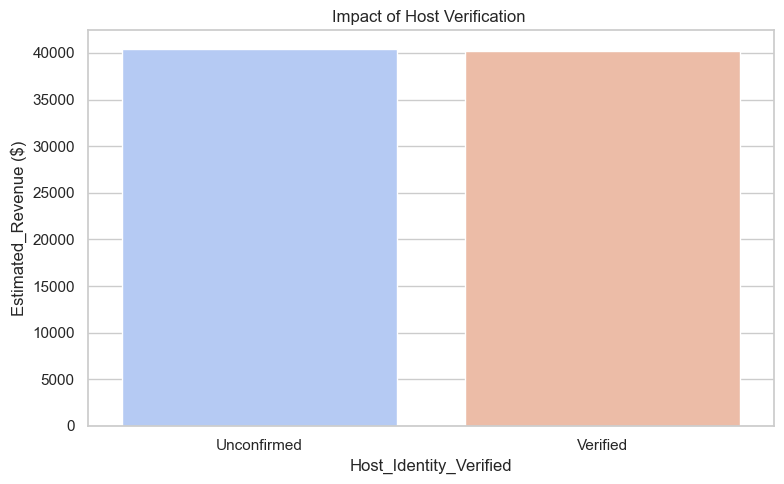

In [105]:
# Group by 'Host_Identity_Verified' and 'Estimated_Revenue'
verfication = df.groupby('Host_Identity_Verified')['Estimated_Revenue'].mean().sort_values(ascending=False).reset_index()

# Set style
sns.set(style="whitegrid")

#  Create a barplot of average estimated revenue by verification status
plt.figure(figsize=(8, 5))
sns.barplot(verfication, x='Host_Identity_Verified', y='Estimated_Revenue', palette='coolwarm')
plt.title('Impact of Host Verification ')
plt.ylabel('Estimated_Revenue ($)')
plt.xlabel('Host_Identity_Verified')
plt.tight_layout()
plt.show()


<h4> What is the Average Availability by Room type?</h4>

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\2459239627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_availability, x='Room_Type', y='Availability_365', palette='viridis', legend=True)


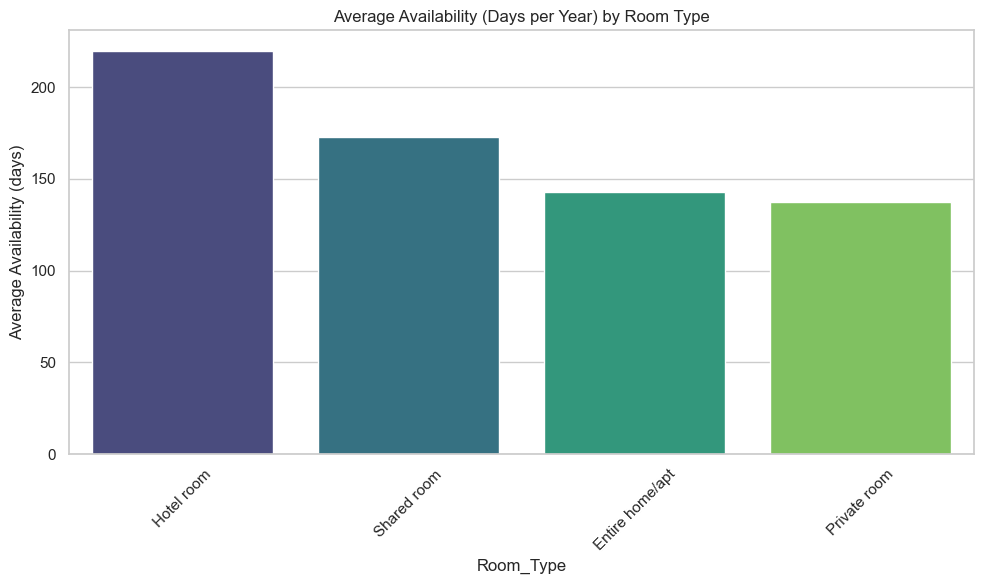

In [106]:
# Group by Room type and Availability_365
room_availability = df.groupby('Room_Type')['Availability_365'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=room_availability, x='Room_Type', y='Availability_365', palette='viridis', legend=True)
plt.title('Average Availability (Days per Year) by Room Type') 
plt.ylabel('Average Availability (days)')
plt.xlabel('Room_Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h4> What is the Average Availabilty by Region? </h4>

C:\Users\NONSO\AppData\Local\Temp\ipykernel_12604\536563231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_availability, x='Region', y='Availability_365', palette='viridis', legend=True)


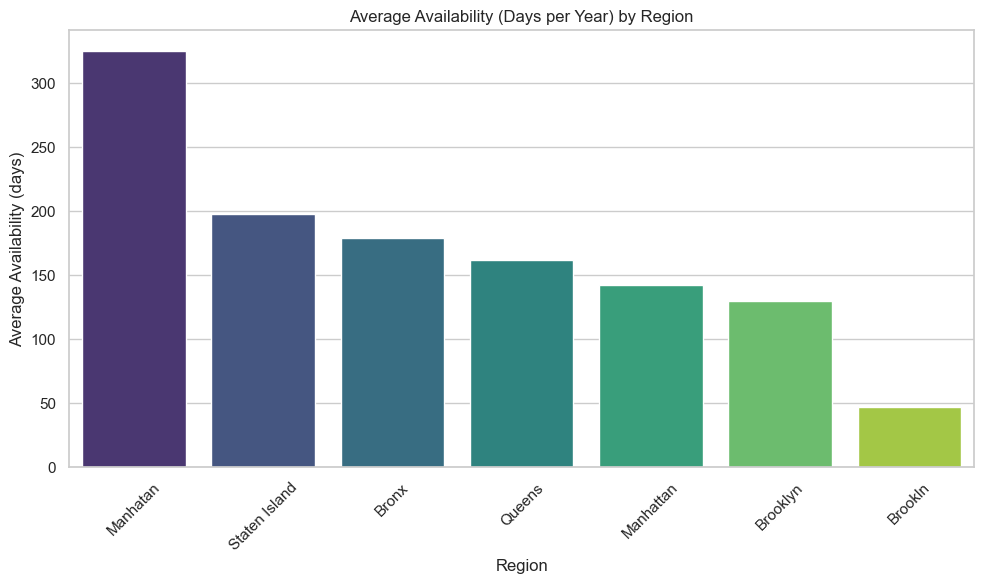

In [107]:
# Group by Region and Availability_365
region_availability = df.groupby('Region')['Availability_365'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=region_availability, x='Region', y='Availability_365', palette='viridis', legend=True)
plt.title('Average Availability (Days per Year) by Region') 
plt.ylabel('Average Availability (days)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h4> What is the Average Availabilty by Region, Room Type & Average Availability?</h4>

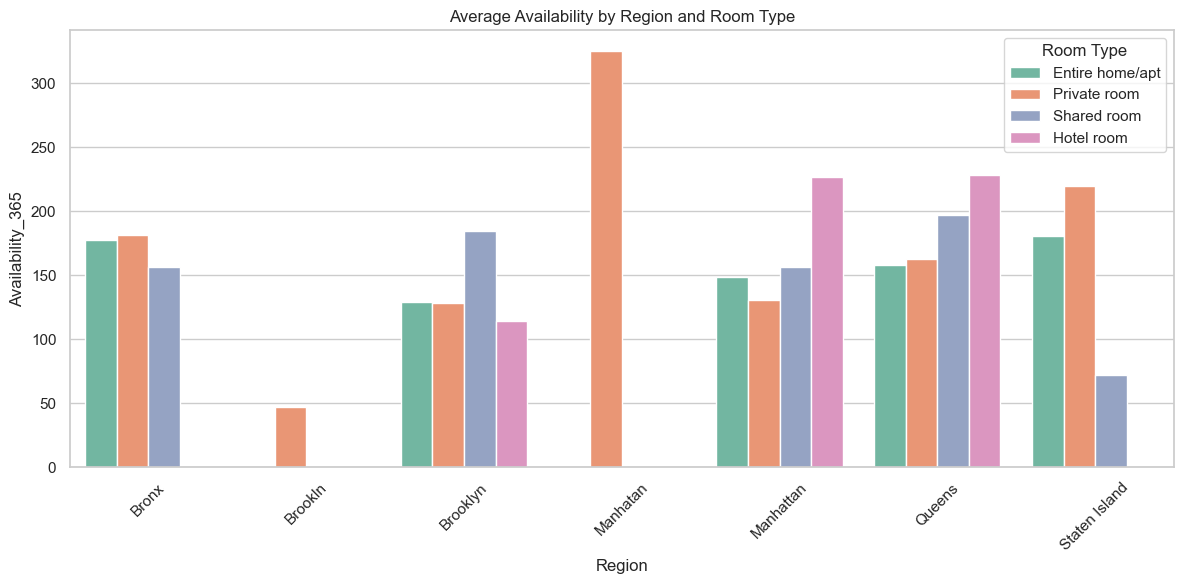

In [108]:
# Group by Region and Room_Type, calculate average availability
grouped = df.groupby(['Region', 'Room_Type'])['Availability_365'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Region', y='Availability_365', hue='Room_Type', palette='Set2')

plt.title('Average Availability by Region and Room Type')
plt.ylabel('Availability_365')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### How does Availability Vary Across Room Types or Cancellation Policies?

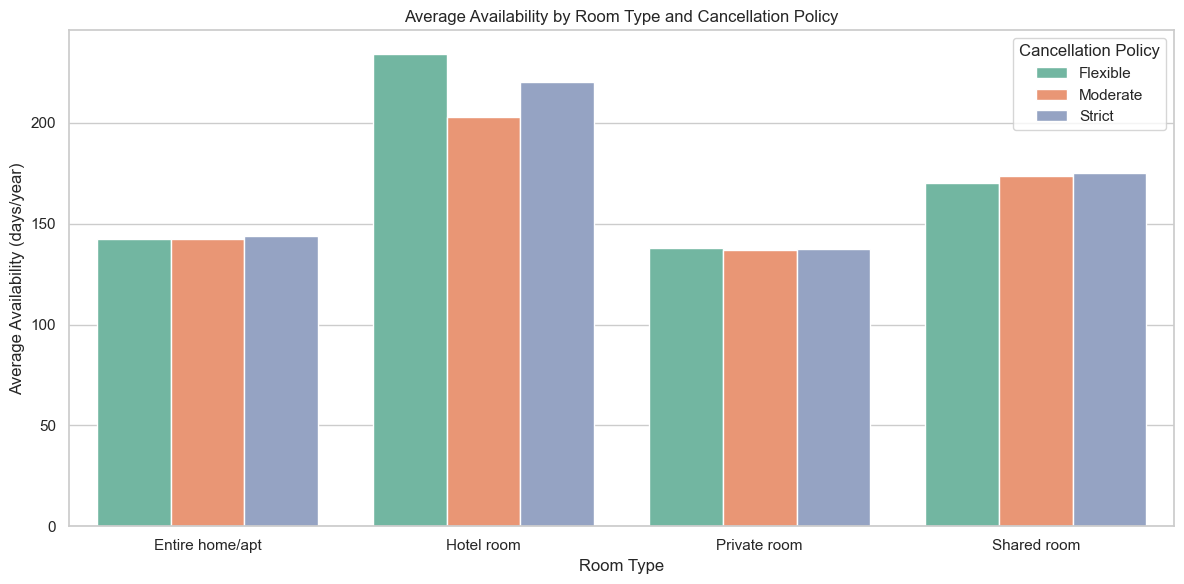

In [109]:
# Group by Room Type and Cancellation Policy
availability_stats = df.groupby(['Room_Type', 'Cancellation_Policy'])['Availability_365'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=availability_stats, x='Room_Type', y='Availability_365', hue='Cancellation_Policy', palette='Set2')

plt.title('Average Availability by Room Type and Cancellation Policy')
plt.ylabel('Average Availability (days/year)')
plt.xlabel('Room Type')
plt.legend(title='Cancellation Policy')
plt.tight_layout()
plt.show()


### Relative distribution of average estimated revenue across different room types?

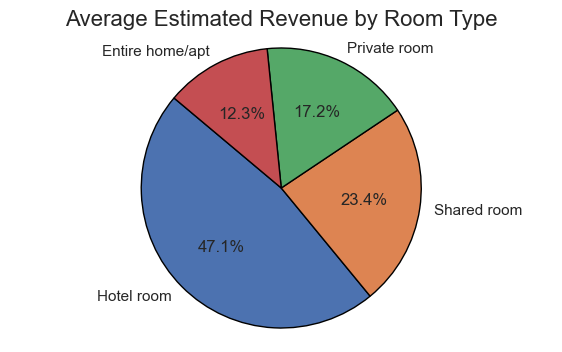

In [111]:
# average revenue per room type
average_revenue_by_room_type = df.groupby('Room_Type')['Estimated_Revenue'].mean().sort_values(ascending=False)

# for the pie chart
labels = average_revenue_by_room_type.index
sizes = average_revenue_by_room_type.values

# Create the pie chart
plt.figure(figsize=(7, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title for clarity and context
plt.title('Average Estimated Revenue by Room Type', fontsize=16)

# equal circle proportion 
plt.axis('equal')

# show the chart
plt.show()


### Relationship between Room Type, Number of Reviews and Region.

<h4> This will answer these two questions:</h4>
<h4>1) Which regions drive more guest engagement?<h4

<h4>2) Which room types are most reviewed in different areas?

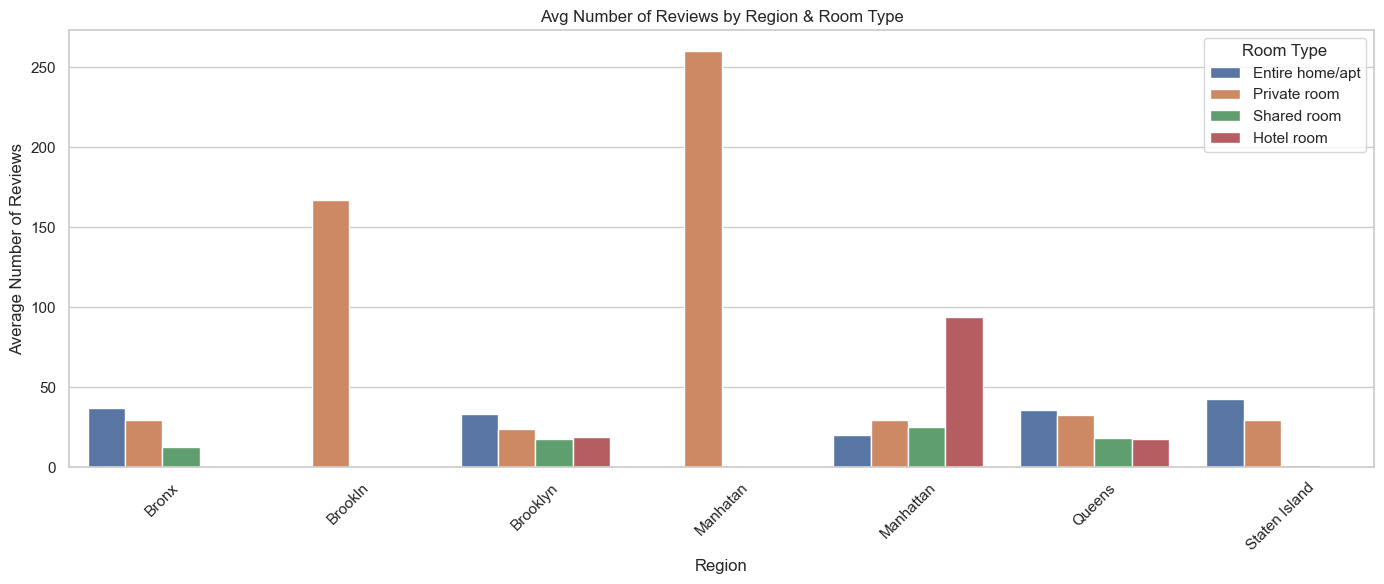

In [112]:
# Group data
grouped = df.groupby(['Region', 'Room_Type'])['Number_of_Reviews'].mean().reset_index()

# Bar plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='Region',
    y='Number_of_Reviews',
    hue='Room_Type',
   
)

plt.title("Avg Number of Reviews by Region & Room Type")
plt.ylabel("Average Number of Reviews")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### Which room types benefit the most from being instant bookable?

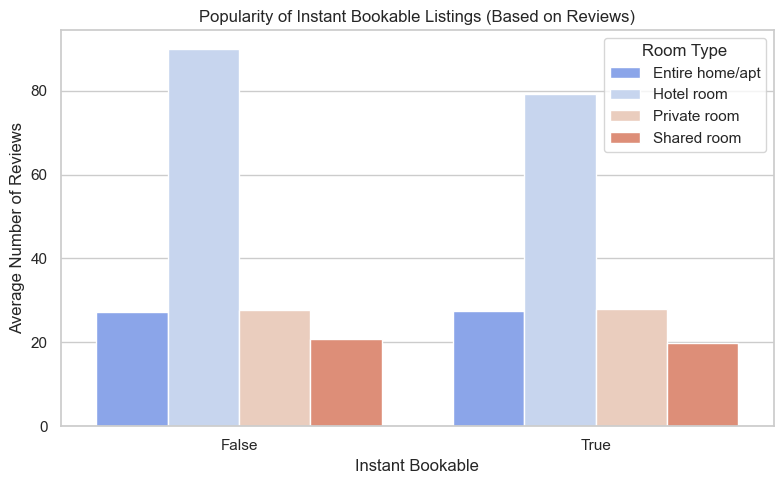

In [113]:
# Group by Instant_Bookable, Room ty and get average number of reviews
instant_bookable_reviews = df.groupby(['Instant_Bookable', 'Room_Type'])['Number_of_Reviews'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=instant_bookable_reviews,
    x='Instant_Bookable',
    y='Number_of_Reviews',
    hue='Room_Type',
    palette='coolwarm'
)
plt.title("Popularity of Instant Bookable Listings (Based on Reviews)")
plt.ylabel("Average Number of Reviews")
plt.xlabel("Instant Bookable")
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### In which regions are Instant Bookable listings most popular (based on average number of reviews), and how does this differ by Room Type?

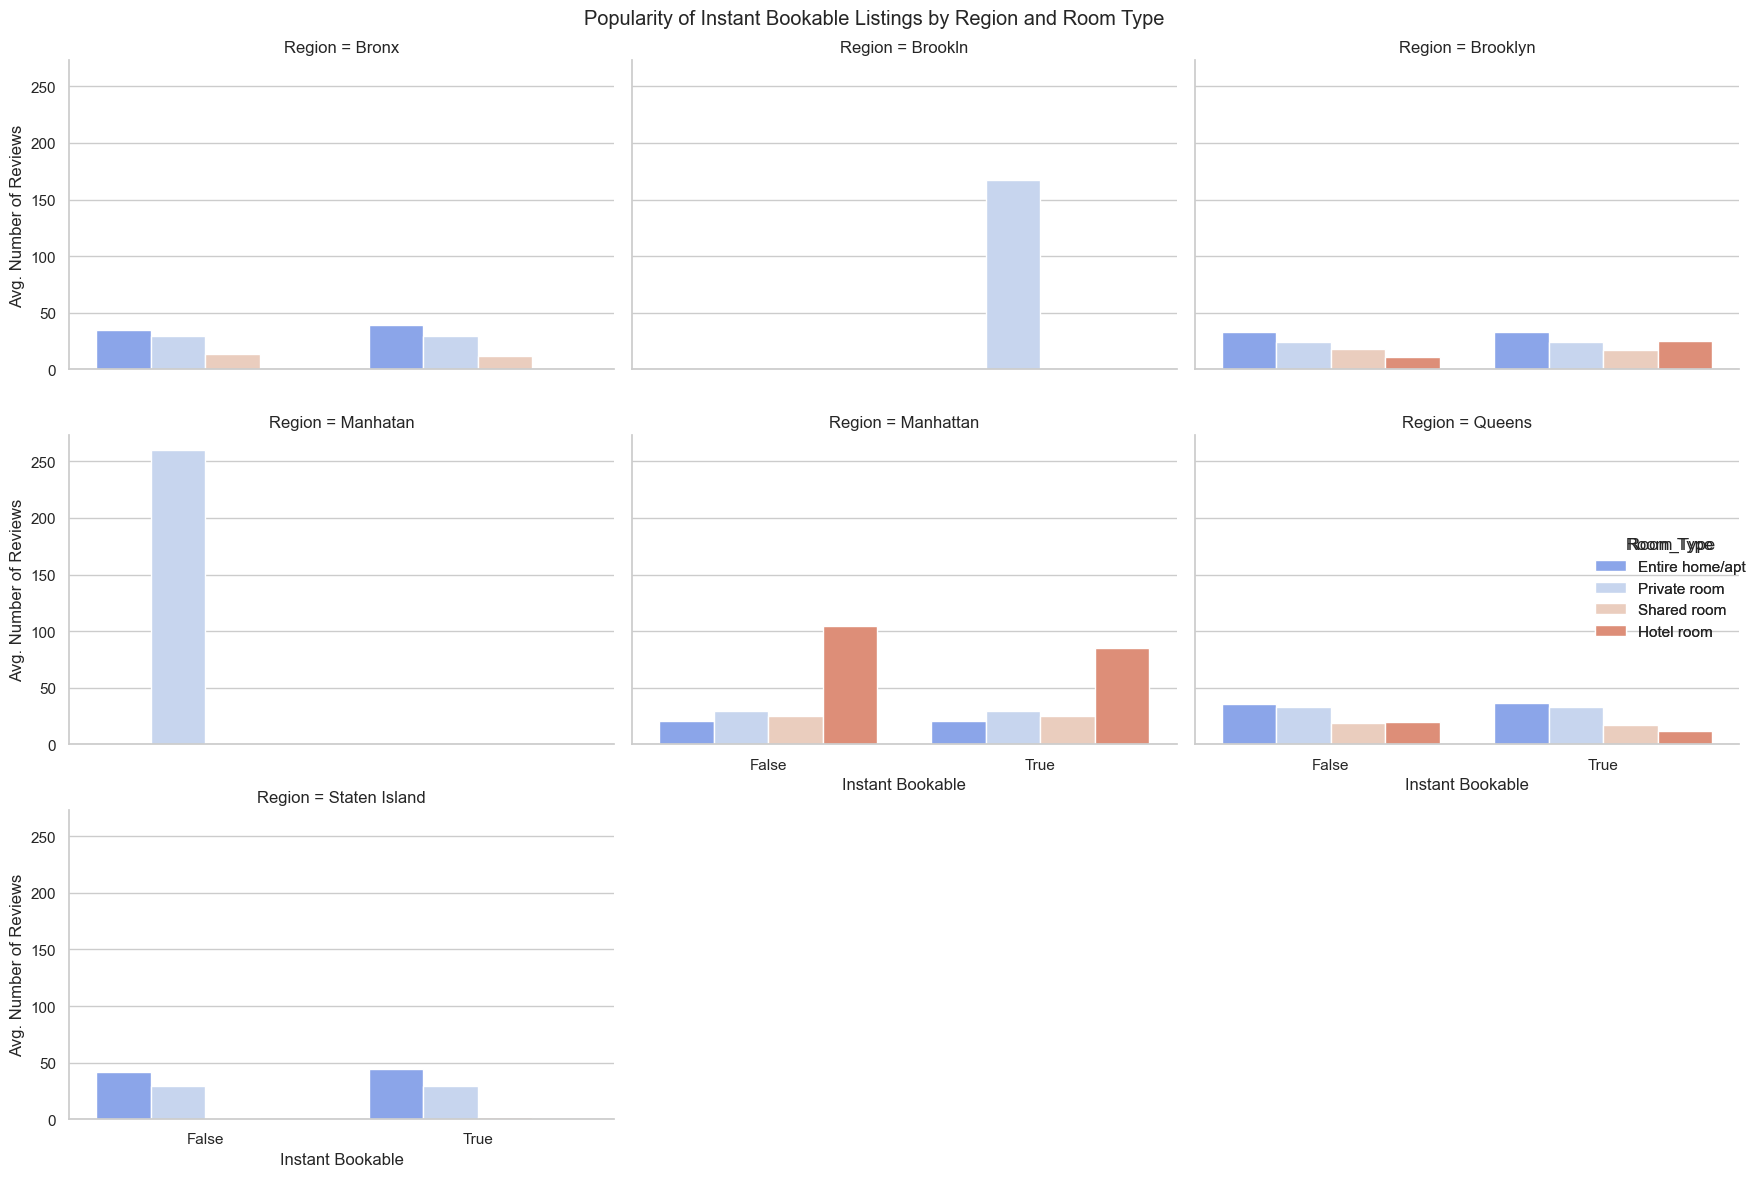

In [114]:
# Group by Instant_Bookable, Room_Type, and Region
insta_region = df.groupby(['Region', 'Instant_Bookable', 'Room_Type'])['Number_of_Reviews'].mean().reset_index()

# Set style
sns.set(style="whitegrid")

# Create FacetGrid: One plot per Region
g = sns.catplot(
    data=insta_region,
    x='Instant_Bookable',
    y='Number_of_Reviews',
    hue='Room_Type',
    col='Region',
    kind='bar',
    col_wrap=3,         # Adjust based on number of regions
    palette='coolwarm',
    height=4,
    aspect=1.2
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Popularity of Instant Bookable Listings by Region and Room Type")
g.set_axis_labels("Instant Bookable", "Avg. Number of Reviews")
g.add_legend(title='Room Type')
plt.tight_layout()
plt.show()


### How does the average price per night vary by construction year and region?

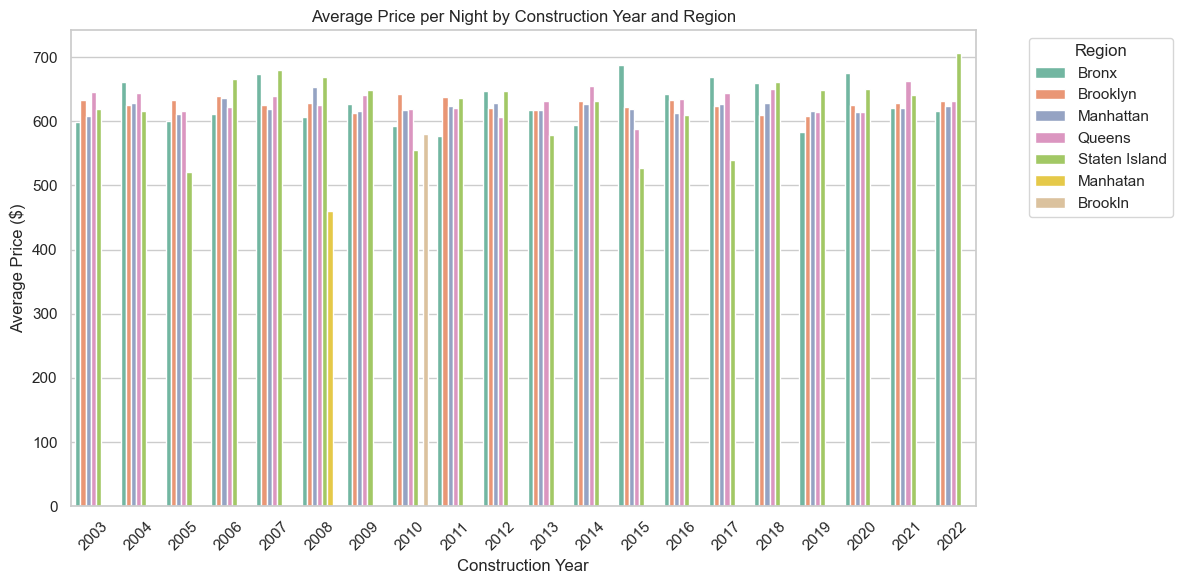

In [116]:
# Filter data: Only include properties built from 2003 onwards
filtered_df = df[df['Construction_Year'] >= 2003]

# Group by Construction Year and Region, then calculate average Price
construction_region_price = filtered_df.groupby(['Construction_Year', 'Region'])['Price'].mean().reset_index()

# Plot: Bar chart of average price by construction year, with hue for Region
plt.figure(figsize=(12, 6))
sns.barplot(data=construction_region_price, x='Construction_Year', y='Price', hue='Region', palette='Set2')

# Add labels and title
plt.title("Average Price per Night by Construction Year and Region")
plt.xlabel("Construction Year")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside
plt.tight_layout()

# Show the plot
plt.show()


### Export the cleaned data

In [117]:
df.to_csv('Cleaned_Airbnb.csv', index=False)  # index=False avoids writing row numbers
